In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

sns.set(style="whitegrid", rc={"figure.figsize": (15, 8)})

In [5]:
PATH_TO_DATA = "data/Walmart Data Analysis and Forcasting.csv"
walmart_data_raw = pd.read_csv(PATH_TO_DATA)

walmart_data_raw.rename(
    columns={"Date":"ds", "Weekly_Sales":"y"}, 
    inplace=True
)

walmart_data_raw.head()

,Store,ds,y,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
walmart_data_raw["ds"] = pd.to_datetime(walmart_data_raw["ds"], format="%d-%m-%Y")

walmart_data_raw = walmart_data_raw.loc[walmart_data_raw["Store"] == 2]

col_to_drop = ["Store", "Holiday_Flag"]
walmart_data = walmart_data_raw.drop(col_to_drop, axis=1)

print(walmart_data.dtypes)

walmart_data.describe()

ds              datetime64[ns]
y                      float64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


,ds,y,Temperature,Fuel_Price,CPI,Unemployment
count,143,1.430000e+02,143.000000,143.000000,143.000000,143.000000
mean,2011-06-17 00:00:00,1.925751e+06,68.216364,3.219699,215.646311,7.623846
min,2010-02-05 00:00:00,1.650394e+06,33.020000,2.514000,209.998458,6.170000
25%,2010-10-11 12:00:00,1.803501e+06,56.735000,2.764500,211.206435,7.057000
50%,2011-06-17 00:00:00,1.879107e+06,69.210000,3.290000,215.109666,7.931000
75%,2012-02-20 12:00:00,1.956927e+06,81.940000,3.594000,220.170572,8.099000
max,2012-10-26 00:00:00,3.436008e+06,93.340000,3.907000,223.078337,8.324000
std,NaN,2.376837e+05,15.492766,0.427313,4.342286,0.615414


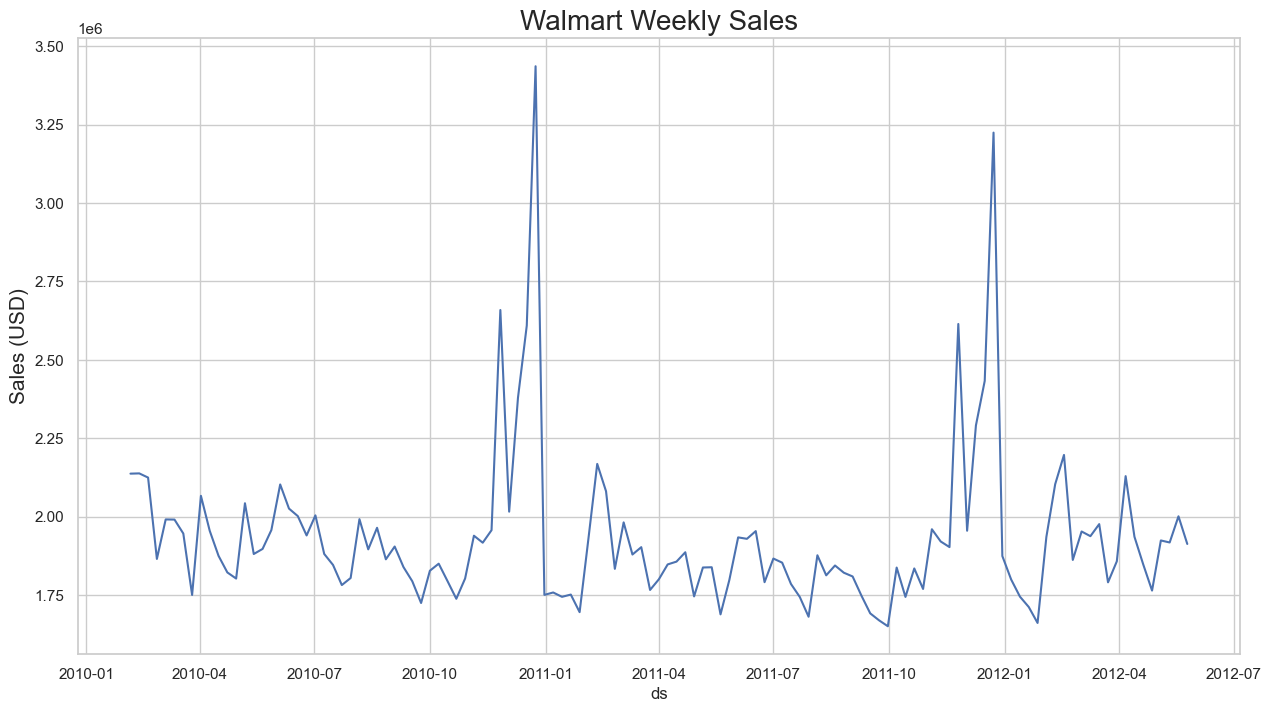

In [8]:
walmart_data_agg = pd.DataFrame(
    walmart_data.groupby("ds").quantile(0.5)
).reset_index()

walmart_data_agg.sort_values("ds", inplace=True)

walmart_data_agg.reset_index(inplace=True)

cutoff = int(np.floor(len(walmart_data_agg) * 0.85))
train = walmart_data_agg.iloc[:cutoff, :]
test = walmart_data_agg[~walmart_data_agg.index.isin(train.index)]

train_plt = sns.lineplot(
    data=train, x="ds", y="y"
);
train_plt.set_title("Walmart Weekly Sales", size=20)
train_plt.set_ylabel("Sales (USD)", size=15);

In [10]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

model = Prophet()
regressors_to_add = ["Temperature", "Fuel_Price", "Unemployment"]
[model.add_regressor(reg) for reg in regressors_to_add]
model.fit(train)
forecast = model.predict(test)

19:59:04 - cmdstanpy - INFO - Chain [1] start processing
19:59:04 - cmdstanpy - INFO - Chain [1] done processing


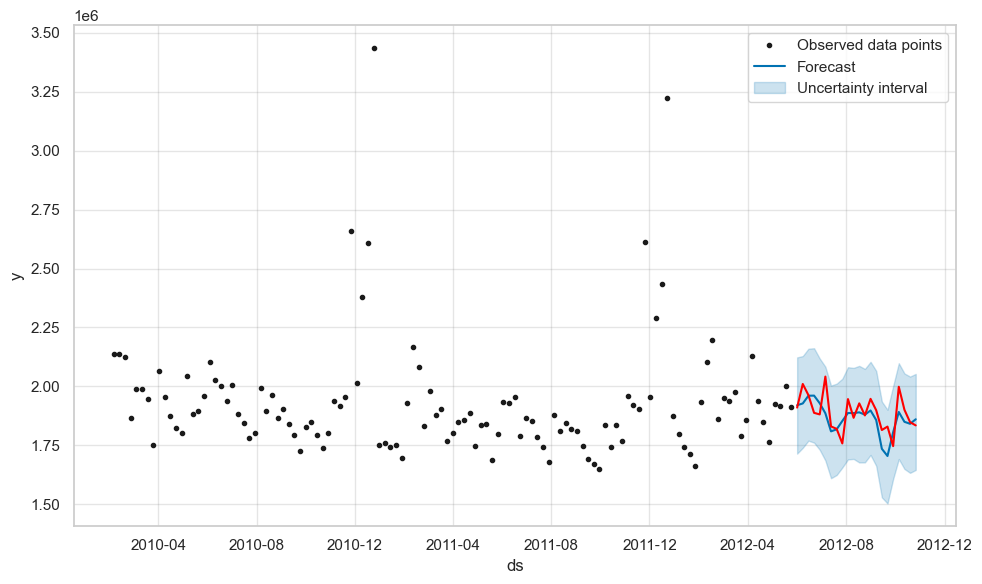

In [11]:
model.plot(forecast);
sns.lineplot(
    data=test,
    x="ds",
    y="y",
    color="red"
)
plt.show()

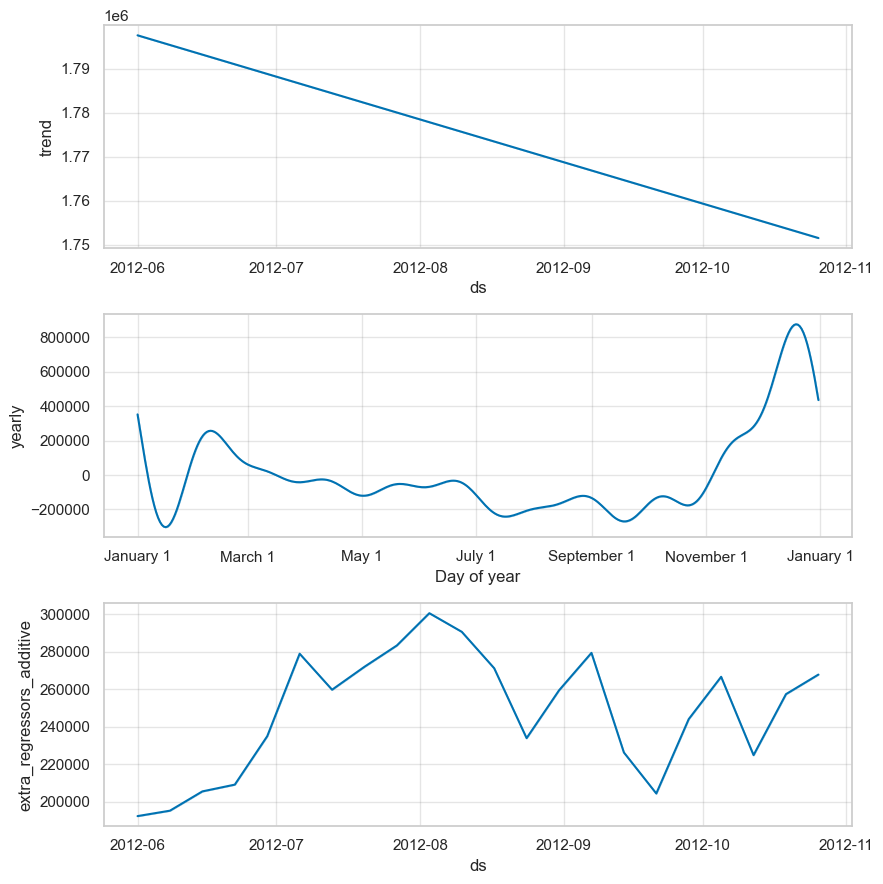

In [12]:
model.plot_components(forecast);